In [267]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [268]:
df = pd.read_csv('function0_2d.csv')
df.head()

,Unnamed: 0,x1,x2,y
0,0,-1.780329,1.833831,7.371565
1,1,-14.448144,13.645452,21.055938
2,2,-5.206188,11.865557,17.921304
3,3,5.885330,11.831869,17.770090
4,4,-4.949820,-12.690380,18.465143


Dataset has 2 input features - x1 and x2

and 1 output variable - y

x1 and x2 lies between (-16,16)

y lies between (3,22)

In [269]:
x1 = np.array(df.x1)
print(x1)
x2 = np.array(df.x2)
y = np.array(df.y)

[ -1.78032948 -14.44814428  -5.20618838 ... -11.19534009  15.9202973
   1.30476708]


<IPython.core.display.Javascript object>


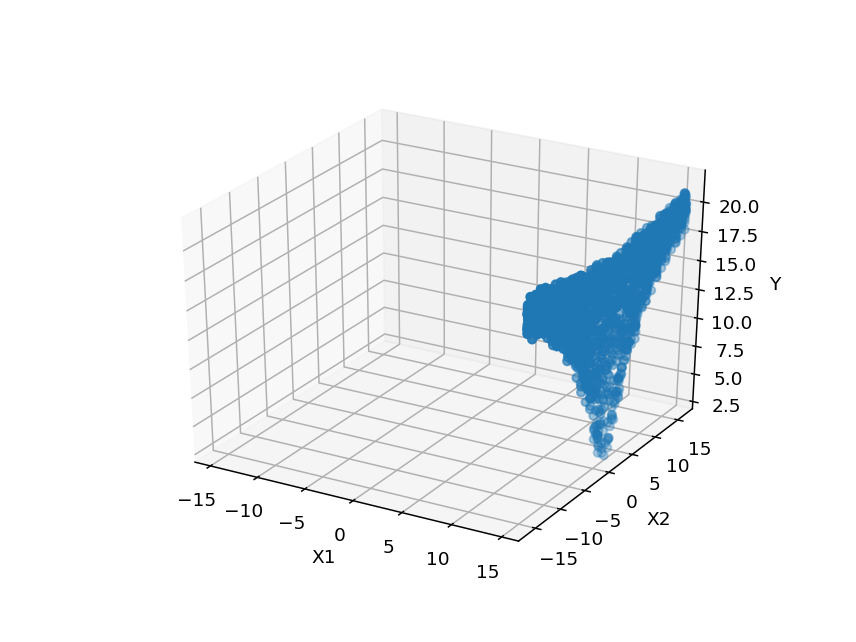

In [282]:
#Getting a General overview of data 


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlim(-16,16)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")

ax.scatter(x1, x2, y)

plt.show()

This looks like a vortex dataset.

In [271]:
def get_feature_mat(x1,x2,deg):
    
#     l = len(x1) # should be equal to len(x2)
    mat = []
    
    for a,b in zip(x1,x2):
        
        d = deg
        arr = [(a**i)*(b**(j)) for i in range(d+1) for j in range(d-i+1)]
        
        mat.append(arr)
        
    return mat 

In [272]:
print(get_feature_mat([1,2],[1,2],4))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 4, 8, 16, 2, 4, 8, 16, 4, 8, 16, 8, 16, 16]]


In [273]:
def get_weights(feature,y):
    
    return np.dot(np.linalg.pinv(feature),y)

In [274]:
def get_sample_data(df,size):
    
    sam = df.sample(n = size, random_state = 1)
    x1 = np.array(sam['x1'])
    x2 = np.array(sam['x2'])
    y = np.array(sam['y'])
    
    return x1, x2, y

In [275]:
def linear_regress_poly_basis(x1,x2,y,deg):
    
#     x,y = get_sample_data(df,sample_size)
    
    features = get_feature_mat(x1,x2,deg)
    
    w_star = get_weights(features,y)
    
    return w_star

In [276]:
def predict(x1, x2, w, deg):
    
    a,b = x1, x2
    d = deg
    f = [(a**i)*(b**(j)) for i in range(d+1) for j in range(d-i+1)]
    
    return np.dot(f,w)

In [277]:
size = 500

X1, X2, Y = get_sample_data(df,size)

In [278]:
x1_axis = np.linspace(-16,16,100)
x2_axis = np.linspace(-16,16,100)

W1 = linear_regress_poly_basis(X1,X2,Y,1)
f1 = get_feature_mat(x1_axis,x2_axis,1)

W2 = linear_regress_poly_basis(X1,X2,Y,2)
f2 = get_feature_mat(x1_axis,x2_axis,2)

W3 = linear_regress_poly_basis(X1,X2,Y,3)
f3 = get_feature_mat(x1_axis,x2_axis,3)

W4 = linear_regress_poly_basis(X1,X2,Y,4)
f4 = get_feature_mat(x1_axis,x2_axis,4)

W6 = linear_regress_poly_basis(X1,X2,Y,6)
f6 = get_feature_mat(x1_axis,x2_axis,6)

In [279]:
print(W3)
print(['a'*i+'b'*j for i in range(3+1) for j in range(3-i+1)])

[ 1.27894673e+01  1.59330120e-02  2.61726429e-02 -6.66127808e-05
 -1.64501918e-02  1.84264790e-03  8.59512124e-05  2.56907325e-02
 -1.16516870e-04  4.03939086e-05]
['', 'b', 'bb', 'bbb', 'a', 'ab', 'abb', 'aa', 'aab', 'aaa']


<IPython.core.display.Javascript object>


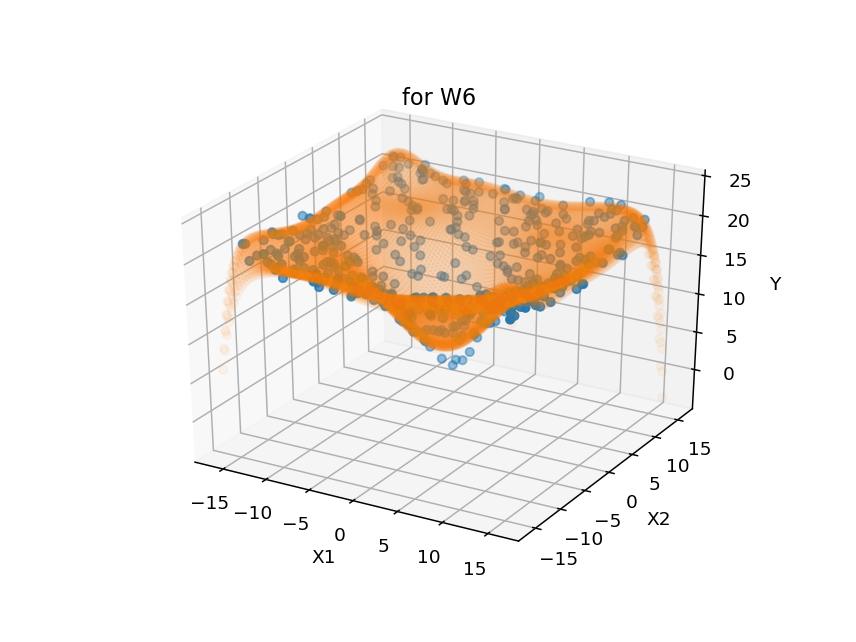

In [280]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('for W6')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")

ax.scatter(X1, X2, Y) # actual data points 


newX1 = []
for x1 in x1_axis:
    newX1 = newX1 + [x1]*100

newX1 = np.array(newX1)
l = list(x2_axis)
newX2 = np.array(l*100)
# print(.shape)

# predicted values from learned model 
z2 = np.array([predict(x1,x2,W2,2) for x1,x2 in zip(newX1,newX2)])
z2 = np.array([predict(x1,x2,W2,2) for x1,x2 in zip(newX1,newX2)])
z2 = np.array([predict(x1,x2,W2,2) for x1,x2 in zip(newX1,newX2)])

ax.scatter(newX1, newX2, z, alpha = 0.05)
plt.show()


# print(f'x1 - {newX1.shape}, x2 - {newX2.shape}, z - {z.shape}')
